In [14]:
# Cell 1: Imports and Setup
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting aesthetics
sns.set(style="whitegrid")

# Define project root and paths
ROOT_DIR = Path.cwd().parents[0]
OUTPUT_DIR = ROOT_DIR / "outputs"
DECODED_DIR = ROOT_DIR / "data" / "decoded"

print(f"Root Path: {ROOT_DIR}")

Root Path: c:\Users\zabal\dev\tesla-fsd-project


In [15]:
# Cell 2: Load Signal Summary CSV
summary_path = OUTPUT_DIR / "signal_summary.csv"

# Read signal summary
signal_df = pd.read_csv(summary_path)
print(f"Loaded {len(signal_df)} signals")

# Show first few rows
signal_df.head()


Loaded 301 signals


,Signal Name,Non-Null Count,Unique Value Count,CAN Sources,Value Labels,Unit
0,DI_driveBlocked,584394,2,"can1-model3, can1-obd, can1-onyx","0=DRIVE_BLOCKED_NONE, 1=DRIVE_BLOCKED_FRUNK, 2...",NaN
1,DI_brakePedalState,389596,4,"can1-obd, can1-opendbc","0=OFF, 1=ON, 2=INVALID, 3=SNA",NaN
2,DI_gear,389596,6,"can1-obd, can1-opendbc","0=INVALID, 1=P, 2=R, 3=N, 4=D, 7=SNA",NaN
3,DI_systemState,196746,3,"can1-obd, can1-opendbc","0=UNAVAILABLE, 1=IDLE, 2=STANDBY, 3=FAULT, 4=A...",NaN
4,DI_proximity,196746,2,"can1-obd, can1-opendbc",NaN,NaN


In [16]:
#Basic Stats - Filter signals with sufficient samples
SIGNAL_COUNT_THRESHOLD = 100
active_signals_df = signal_df[signal_df.iloc[:, 1] > SIGNAL_COUNT_THRESHOLD]

print(f"Signals with more than {SIGNAL_COUNT_THRESHOLD} samples: {len(active_signals_df)}")
active_signals_df.head()


Signals with more than 100 samples: 301


,Signal Name,Non-Null Count,Unique Value Count,CAN Sources,Value Labels,Unit
0,DI_driveBlocked,584394,2,"can1-model3, can1-obd, can1-onyx","0=DRIVE_BLOCKED_NONE, 1=DRIVE_BLOCKED_FRUNK, 2...",NaN
1,DI_brakePedalState,389596,4,"can1-obd, can1-opendbc","0=OFF, 1=ON, 2=INVALID, 3=SNA",NaN
2,DI_gear,389596,6,"can1-obd, can1-opendbc","0=INVALID, 1=P, 2=R, 3=N, 4=D, 7=SNA",NaN
3,DI_systemState,196746,3,"can1-obd, can1-opendbc","0=UNAVAILABLE, 1=IDLE, 2=STANDBY, 3=FAULT, 4=A...",NaN
4,DI_proximity,196746,2,"can1-obd, can1-opendbc",NaN,NaN


In [17]:
# Cell 4: Group signals by prefix
def categorize_signal(name):
    if name.startswith("DAS_"):
        return "DAS"
    elif name.startswith("DI_"):
        return "DI"
    elif name.startswith("UI_"):
        return "UI"
    else:
        return "Other"

active_signals_df["category"] = active_signals_df.iloc[:, 0].apply(categorize_signal)

# Count how many in each
active_signals_df["category"].value_counts()


category
Other    133
UI        86
DI        54
DAS       28
Name: count, dtype: int64

C:\Users\zabal\AppData\Local\Temp\ipykernel_38980\4163522474.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=active_signals_df, x="category", palette="pastel")


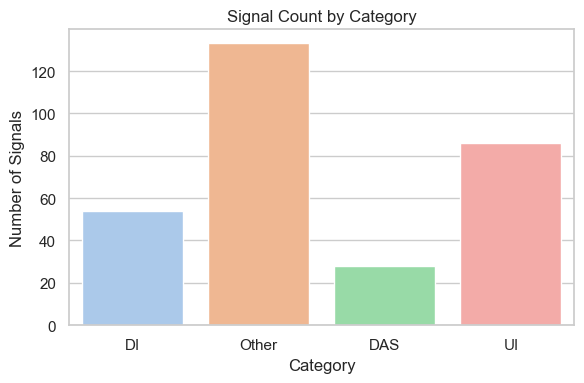

In [18]:
# Cell 5: Plot - Distribution of signals by category
plt.figure(figsize=(6, 4))
sns.countplot(data=active_signals_df, x="category", palette="pastel")
plt.title("Signal Count by Category")
plt.xlabel("Category")
plt.ylabel("Number of Signals")
plt.tight_layout()
plt.show()


C:\Users\zabal\AppData\Local\Temp\ipykernel_38980\4222556.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


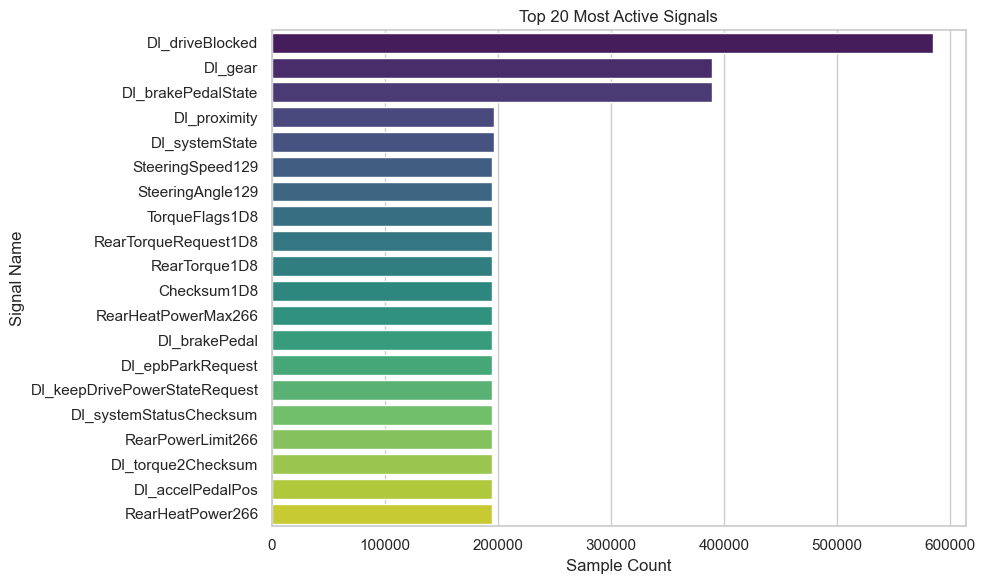

In [19]:
# Cell 6: Top 20 Most Active Signals
top_signals = active_signals_df.sort_values(by=active_signals_df.columns[1], ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_signals,
    y=top_signals.columns[0],
    x=top_signals.columns[1],
    palette="viridis"
)
plt.title("Top 20 Most Active Signals")
plt.xlabel("Sample Count")
plt.ylabel("Signal Name")
plt.tight_layout()
plt.show()


In [20]:
# Cell 7: Export filtered signal list (optional)
filtered_csv_path = OUTPUT_DIR / "filtered_signals_over_100.csv"
active_signals_df.to_csv(filtered_csv_path, index=False)
print(f"Exported filtered signal list to: {filtered_csv_path}")


Exported filtered signal list to: c:\Users\zabal\dev\tesla-fsd-project\outputs\filtered_signals_over_100.csv
